# Practical: Basic ML Tasks
## Linear Regression
In this section, we will implement a simple linear regression model using PyTorch. Linear regression is a supervised learning algorithm used for predicting a continuous target variable based on one or more input features.

2.509335517883301 2.2644999027252197


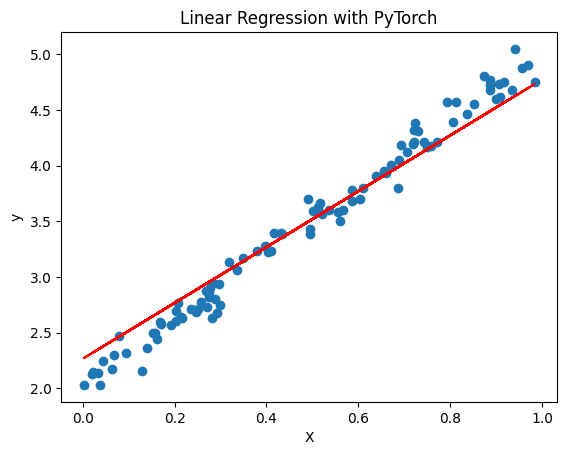

In [1]:
import torch

# Generate some data
X = torch.rand(100, 1)
y = 3 * X + 2 + 0.1 * torch.randn(100, 1)  # y = 3x + 2 + noise

# Define model
model = torch.nn.Linear(1, 1)  
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
for _ in range(100):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()

print(model.weight.item(), model.bias.item())  # Should be close to 3 and 2

# Plot the data
import matplotlib.pyplot as plt
plt.scatter(X.numpy(), y.numpy())
plt.plot(X.numpy(), model(X).detach().numpy(), 'r')
plt.title('Linear Regression with PyTorch')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


## Classification
In this section, we will implement a simple classification model using PyTorch. Classification is a supervised learning algorithm used for predicting a categorical target variable based on one or more input features.

Epoch 0 - Loss: 0.6439868807792664
Epoch 1 - Loss: 0.6417495608329773
Epoch 2 - Loss: 0.6396124362945557
Epoch 3 - Loss: 0.6375687122344971
Epoch 4 - Loss: 0.6356122493743896
Epoch 5 - Loss: 0.6337370872497559
Epoch 6 - Loss: 0.6319378614425659
Epoch 7 - Loss: 0.6302095055580139
Epoch 8 - Loss: 0.6285470724105835
Epoch 9 - Loss: 0.626946210861206
Epoch 10 - Loss: 0.6254027485847473
Epoch 11 - Loss: 0.6239128112792969
Epoch 12 - Loss: 0.6224728226661682
Epoch 13 - Loss: 0.6210793852806091
Epoch 14 - Loss: 0.6197293996810913
Epoch 15 - Loss: 0.6184199452400208
Epoch 16 - Loss: 0.617148220539093
Epoch 17 - Loss: 0.6159117817878723
Epoch 18 - Loss: 0.6147083044052124
Epoch 19 - Loss: 0.6135355234146118
Epoch 20 - Loss: 0.6123914122581482
Epoch 21 - Loss: 0.6112741827964783
Epoch 22 - Loss: 0.6101820468902588
Epoch 23 - Loss: 0.6091132760047913
Epoch 24 - Loss: 0.6080664396286011
Epoch 25 - Loss: 0.6070401072502136
Epoch 26 - Loss: 0.6060330271720886
Epoch 27 - Loss: 0.6050437688827515
Epoc

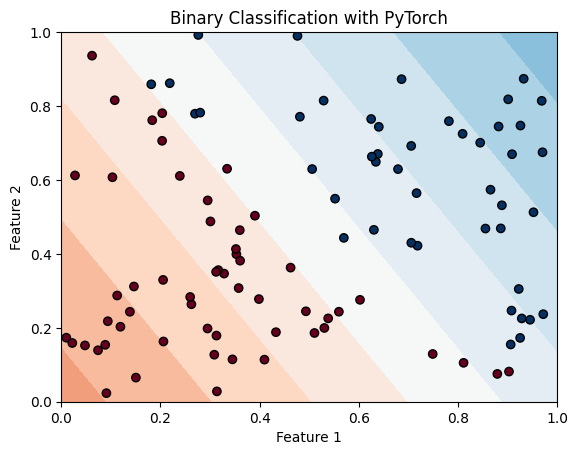

In [6]:
import numpy as np

# Simulated binary classification data
X = torch.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).float().unsqueeze(1)

model = torch.nn.Linear(2, 1)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
for _ in range(100):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    print(f"Epoch {_} - Loss: {loss.item()}")

# Plotting
    
import matplotlib.pyplot as plt
    
# Get predictions
    
y_pred_np = torch.sigmoid(model(X)).detach().numpy()
    
# Plotting the decision boundary
    
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_torch = torch.tensor(grid, dtype=torch.float32)
probs = torch.sigmoid(model(grid_torch)).detach().numpy().reshape(xx.shape)
    
plt.contourf(xx, yy, probs, levels=np.linspace(0, 1, 20), cmap=plt.cm.RdBu)
plt.scatter(X[:, 0].numpy(), X[:, 1].numpy(), c=y.numpy().ravel(), cmap=plt.cm.RdBu, edgecolors='k')
plt.title('Binary Classification with PyTorch')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Clustering
In this section, we will implement a simple clustering model using PyTorch. Clustering is an unsupervised learning algorithm used for grouping similar data points together based on their features.

tensor([0, 0, 1, 0, 1, 0, 2, 1, 0, 1])


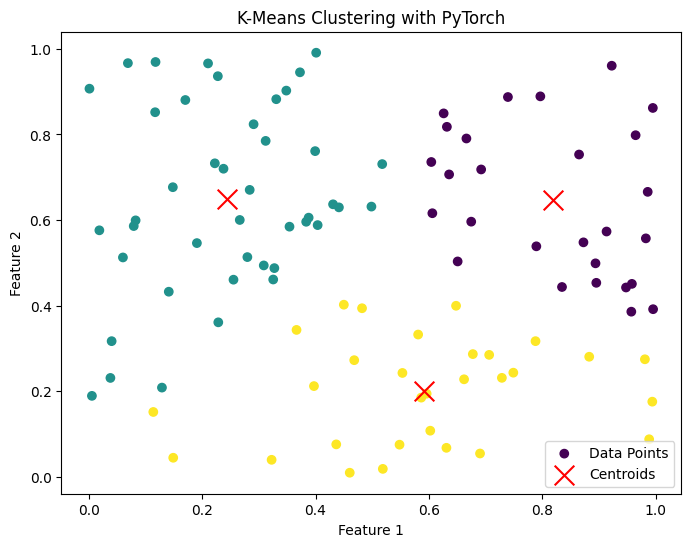

In [3]:
import torch

def kmeans(X, k, num_iters=10):
    """Simple K-Means implementation in PyTorch."""
    n_samples, n_features = X.shape
    centroids = X[torch.randperm(n_samples)[:k]]  # Randomly initialize centroids

    for _ in range(num_iters):
        # Compute distances to centroids
        distances = torch.cdist(X, centroids)  # Compute pairwise distances
        cluster_assignments = distances.argmin(dim=1)  # Assign clusters to points

        # Compute new centroids
        for i in range(k):
            centroids[i] = X[cluster_assignments == i].mean(dim=0)
    
    return cluster_assignments, centroids

# Sample data
X = torch.rand(100, 2)  # 100 points in 2D
labels, centroids = kmeans(X, k=3)

print(labels[:10])  # Cluster labels of first 10 points
import matplotlib.pyplot as plt

# Convert to numpy for plotting
X_np = X.numpy()
labels_np = labels.numpy()
centroids_np = centroids.numpy()

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X_np[:, 0], X_np[:, 1], c=labels_np, cmap='viridis', label='Data Points')
plt.scatter(centroids_np[:, 0], centroids_np[:, 1], marker='x', s=200, color='red', label='Centroids')
plt.title('K-Means Clustering with PyTorch')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## PCA
In this section, we will implement a simple PCA model using PyTorch. PCA (Principal Component Analysis) is an unsupervised learning algorithm used for dimensionality reduction by transforming the data into a lower-dimensional space while preserving as much variance as possible.

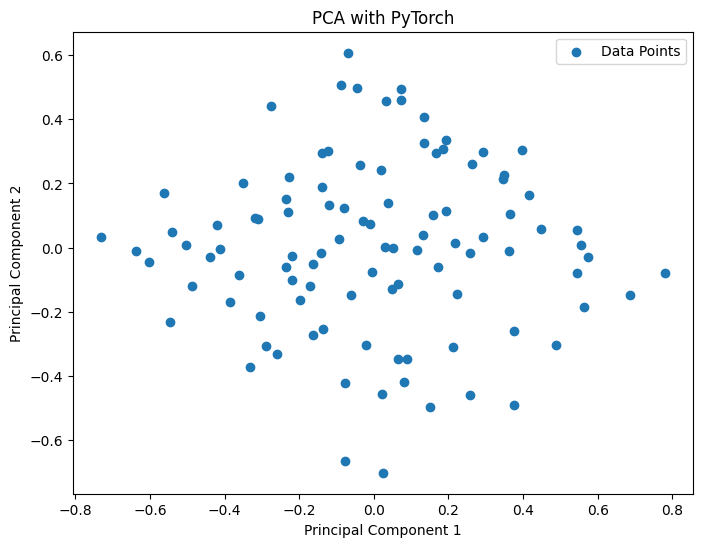

In [7]:
import torch
import matplotlib.pyplot as plt
# PCA implementation using PyTorch
def pca(X, num_components):
    # Center the data
    X_mean = X - X.mean(dim=0)
    
    # Compute covariance matrix
    covariance_matrix = torch.mm(X_mean.T, X_mean) / (X_mean.shape[0] - 1)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = torch.linalg.eigh(covariance_matrix)
    
    # Sort eigenvectors by eigenvalues in descending order
    sorted_indices = torch.argsort(eigenvalues, descending=True)
    principal_components = eigenvectors[:, sorted_indices[:num_components]]
    
    # Project data onto principal components
    reduced_data = torch.mm(X_mean, principal_components)
    
    return reduced_data, principal_components

# Sample data
X = torch.rand(100, 3)  # 100 points in 3D

# Perform PCA to reduce to 2 dimensions
reduced_data, principal_components = pca(X, num_components=2)

# Convert to numpy for plotting
reduced_data_np = reduced_data.numpy()

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_np[:, 0], reduced_data_np[:, 1], label='Data Points')
plt.title('PCA with PyTorch')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()